# Bragg diffraction Lab Jupyter Notebook 

Author: Jonathan Hasan 

Class: Modern Physics 340 

Date: 4/4/2022

Purpose: 

Need to determine the lattice constants for two "mystery crystals". One of them is NaCl and the other is LIF

## Import Libraries

In [194]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import odr

%matplotlib notebook

# Background 

Braggs law describes the diffraction of plane waves off of atoms in a crystal lattice. When plane waves hit that atoms in the crystal they can reflect ("bounce off") at an angle $\theta$. These atoms in the crystal have a fixed spacing, "d". 

The below figure shows this result. 

![Fig 7](LatticeStructureExample.JPEG "Example")

Source: https://osf.io/37q46/wiki/2.%20Theory/

When the plane wave hits the crystal atoms. It acts like a wave hitting a diffraction grating. It ends up diffracting and causing these interference patterns. There are some areas where the waves constructively interfere. Using this phenomenon, it is possible to determine important information about the crystals structure 

The xrays will hit the crystal atoms and then bounce off at a glancing angle, $\theta$ and the constructive interference happens when the path length is an integer multiple of the wavelength. 


![Fig 7](X-rayDiffraction.JPEG "Example")

Source: https://osf.io/37q46/wiki/2.%20Theory/

## Define constants 

There are lattice constants associated with each crystal. 

Literature reference for values are shown below. 

The a0 for LiF is .4026 nm and the a0 for NaCl is .564 nm.

$k_{\alpha}$ and $k_{\beta}$ are emissions lines that happen when the electrons hit the molybdenum and the xrays travel towards the crystal. Then these xrays hit the crystal and create different modes of diffraction.

$k_{\alpha}$ and $k_{\beta}$ are shown below 

![Fig 7](DataTableForKaAndKb.PNG "Example")

Source: https://osf.io/37q46/wiki/2.%20Theory/

$k_{\alpha}$ and $k_{\beta}$ have uncertainties associated with them, they should be half of the digit after the smallest significant digit. 

In this case it should be .05 pm for both 


In [195]:
#Lattice constants 

a0_LiF = .4026 * (1*10**-9) # nm 

a0_NaCl = ((282.01)*2)*(1*10**-12)

# emitted wavelengths and associated uncertanties 
ka = 71.08

ka_unc = .005

kb = 63.09 

kb_unc = .005

#Creating arrays from wavelengths and uncertainty wavelength 
wave = np.array([ka, kb])* (1*10**-12)

wave_unc = np.array([ka_unc, kb_unc])* (1*10**-12)

## Define functions to be used 

In [196]:
# functions for propagating uncertanties 

def multiply_uncertainties(a, del_a, b, del_b):
    q = a*b
    
    #del_q = q * ((del_a/a)+(del_b/b))
    del_q = q * np.sqrt(((del_a/a)**2+(del_b/b)**2))
    
    return q, del_q 

def divide_uncertainties(a, del_a, b, del_b): 
    q = a/b
    
    #del_q = q * ((del_a/a)+(del_b/b))
    del_q = q * np.sqrt(((del_a/a)**2+(del_b/b)**2))
    
    return q, del_q     




# Define Bragg equation function 

The uncertainty on the theta value here requires the use of equation 3.18 which is 

$\frac{df}{d\theta} * \theta$

In [240]:
# calculate theta from the bragg equation

def bragg(n, a0, wave, wave_unc ):
    term1, term2 = (multiply_uncertainties(n, 0, wave, wave_unc))
    
    theta, del_theta = divide_uncertainties(term1, term2, a0, 0)
    
    theta = np.arcsin(theta)
    
    # for del theta not as simple as doing np.arcsin(del_theta). Need to find df/dtheta * theta 
    del_theta = np.arcsin(theta * a0 * np.cos(theta))
                    
    return theta, del_theta

Acquired the wave array and now it is possible to find the two wavelengths needed for the Beta limits on the didactyl machine. 

# NaCL crystal modes 1 - 3

In [241]:
#mode 1 

rad_1 = bragg(1,a0_NaCl, wave, wave_unc)

#mode 2 
rad_2 = bragg(2,a0_NaCl, wave, wave_unc)

#mode 3 
rad_3 = bragg(3,a0_NaCl, wave, wave_unc)

### Convert the values to degrees 

In [242]:
np.degrees([rad_1, rad_2, rad_3])

array([[[7.23988854e+00, 6.42241698e+00],
        [4.05088549e-09, 3.59963846e-09]],

       [[1.45987236e+01, 1.29273547e+01],
        [7.96813652e-09, 7.10648529e-09]],

       [[2.22142903e+01, 1.96073981e+01],
        [1.15993329e-08, 1.04177010e-08]]])

In [243]:
degree1 = np.degrees([rad_1, rad_2, rad_3])

# LiF crystal modes 1 - 3 

In [244]:
# mode 1 

rad_4 = bragg(1,a0_LiF, wave, wave_unc)

# mode 2 
rad_5 = bragg(2,a0_LiF, wave, wave_unc)

# mode 3

rad_6 = bragg(3,a0_LiF, wave, wave_unc)

### Convert values to degrees

In [245]:
degree2 = np.degrees([rad_4, rad_5, rad_6])

degree2

array([[[1.01690114e+01, 9.01577577e+00],
        [4.02973164e-09, 3.58490658e-09]],

       [[2.06773377e+01, 1.82650235e+01],
        [7.78845061e-09, 6.98300701e-09]],

       [[3.19822980e+01, 2.80420360e+01],
        [1.09216369e-08, 9.96434309e-09]]])

# Summarize results for both crystals 

Found ranges to look out for for each crystal. The results are summarized below. 

## NaCl Crystal 

In [246]:

arr = 0 
mode = 1
count = 0 

print("Data for NaCl crystal")
while arr < 3:

    for theta, theta_unc in zip(degree1[arr][0], degree1[arr][1]):
        if(count == 0):
            print("theta for mode " + str(mode) + " for Ka is "  + str(np.round((theta), 4)) + " +/- " + str(np.round((theta_unc), 4)))
            count = 1 
        else:
            print("theta for mode " + str(mode) + " for Kb is "  + str(np.round((theta), 4)) + " +/- " + str(np.round((theta_unc), 4)))
            count = 0 
    arr+=1
    mode+=1

Data for NaCl crystal
theta for mode 1 for Ka is 7.2399 +/- 0.0
theta for mode 1 for Kb is 6.4224 +/- 0.0
theta for mode 2 for Ka is 14.5987 +/- 0.0
theta for mode 2 for Kb is 12.9274 +/- 0.0
theta for mode 3 for Ka is 22.2143 +/- 0.0
theta for mode 3 for Kb is 19.6074 +/- 0.0


## LiF Crystal 

In [247]:

arr = 0 
mode = 1
count = 0 

print("Data for LiF crystal")
while arr < 3:

    for theta, theta_unc in zip(degree2[arr][0], degree2[arr][1]):
        if(count == 0):
            print("theta for mode " + str(mode) + " for Ka is " + str(np.round((theta), 4)) + " +/- " + str(np.round((theta_unc), 4)))
            count = 1 
        else:
            print("theta for mode " + str(mode) + " for Kb is "  + str(np.round((theta), 4)) + " +/- " + str(np.round((theta_unc), 4)))
            count = 0 
    arr+=1
    mode+=1
    

Data for LiF crystal
theta for mode 1 for Ka is 10.169 +/- 0.0
theta for mode 1 for Kb is 9.0158 +/- 0.0
theta for mode 2 for Ka is 20.6773 +/- 0.0
theta for mode 2 for Kb is 18.265 +/- 0.0
theta for mode 3 for Ka is 31.9823 +/- 0.0
theta for mode 3 for Kb is 28.042 +/- 0.0


So these values are now used to determine the ranges for targeting in fine runs for modes 1 - 3. 

# Determine the lattice constants for both crystals 

Once the data is acquired. It is necessary to use the data from the "Calculate Peak Center" option and then plot those. 

graph $n*\lambda$ vs $sin(\theta)$ for the acquisition of the lattice constants. 

In [248]:
ka_array = wave[0] * np.array([1,2,3])

ka_array_unc = np.array([.0005, .0005,.0005]) * (10 ** -12)

kb_array = wave[1] * np.array([1,2,3])

kb_array_unc = np.array([.0005, .0005, .0005])* (10 ** -12)



# Data for Crystal 1 


The crystal 1 had a raw run shown below

![Fig 7](NaClScan.PNG "Example")


Crystal 1 has the following graphs for each mode

## mode 1 

![Fig 7](NaClMode1.PNG "NaClMode1")

## mode 2

![Fig 7](NaClMode2.PNG "NaClMode2")

## mode 3 

![Fig 7](NaClMode3.PNG "NaClMode3")

The "Calculate Peak Center" Function was used to determine the values of the peak values. These values are stored in the arrays in the next cell. 

In [249]:
# Data from each mode for crystal 1 

theta_ka_1 = np.array([7.0, 14.4, 22.0])

theta_ka_unc_1 = np.array([.05, .05, .05])

theta_kb_1 = np.array([6.2, 12.8, 19.5 ])

theta_kb_unc_1 = np.array([.05, .05, .05])

In [250]:
# Data for 1

#theta_ka_1 = np.array([degree1[0][0][0], degree1[1][0][0],degree1[2][0][0]])

#theta_ka_unc_1 = np.array([degree1[0][1][0], degree1[1][1][0],degree1[2][1][0]])

#theta_kb_1 = np.array([degree1[0][0][1], degree1[1][0][1],degree1[2][0][1]])

#theta_kb_unc_1 = np.array([degree1[0][1][1], degree1[1][1][1],degree1[2][1][1]])

<IPython.core.display.Javascript object>


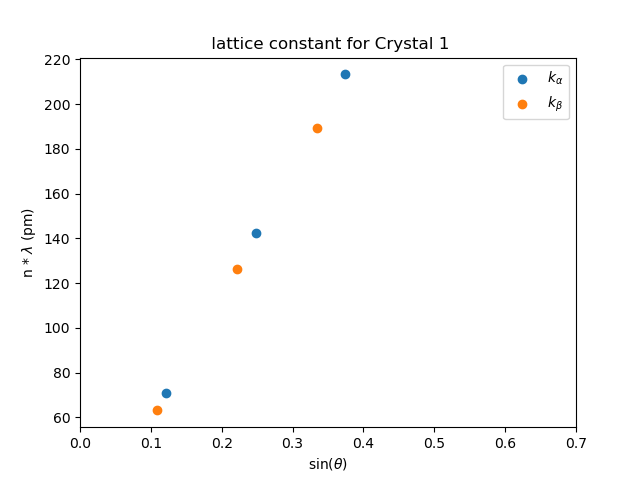

Text(0.5, 1.0, ' lattice constant for Crystal 1')

In [208]:
plt.figure()

plt.errorbar(np.sin(theta_ka_1 * (np.pi/180)), ka_array/(1*10**-12) , xerr =np.sin(theta_ka_unc_1* (np.pi/180)), yerr = ka_array_unc/(1*10**-12) , ls = 'none')

plt.errorbar(np.sin(theta_kb_1 * (np.pi/180)), kb_array/(1*10**-12) , xerr =np.sin(theta_kb_unc_1* (np.pi/180)), yerr = kb_array_unc/(1*10**-12) , ls = 'none')

plt.scatter(np.sin(theta_ka_1*(np.pi/180)), ka_array/(1*10**-12))

plt.scatter(np.sin(theta_kb_1*(np.pi/180)), kb_array/(1*10**-12))

plt.xlabel("sin(" +  (r"$\theta$") + ")")

plt.xlim((0, .7))

plt.ylabel("n * $\lambda$ (pm)")

plt.legend([r"$k_{\alpha}$" , r"$k_{\beta}$"])

plt.title(" lattice constant for Crystal 1")

# Data for Crystal 2 

The crystal 2 had a raw run shown below

![Fig 7](LiFScan.PNG "Example")


Crystal 2 has the following graphs for each mode

## mode 1 

![Fig 7](LiFMode1.PNG "Example")

## mode 2

![Fig 7](LiFMode2.PNG "Example")

## mode 3 

![Fig 7](LiFMode3.PNG "Example")

The "Calculate Peak Center" Function was used to determine the values of the peak values. These values are stored in the arrays in the next cell. 

In [209]:
# Data from X-ray machine for crystal 2 

theta_ka_2 = np.array([10.2, 20.6, 31.8])

theta_ka_unc_2 = np.array([.05, .05, .05])

theta_kb_2 = np.array([8.9, 18.3, 28.1])

theta_kb_unc_2 = np.array([.05, .05, .05])

In [210]:
# Data for Crystal 2 

#theta_ka_2 = np.array([degree2[0][0][0], degree2[1][0][0],degree2[2][0][0]])

#theta_ka_unc_2 = np.array([degree2[0][1][0], degree2[1][1][0],degree2[2][1][0]])

#theta_kb_2 = np.array([degree2[0][0][1], degree2[1][0][1],degree2[2][0][1]])

#theta_kb_unc_2 = np.array([degree2[0][1][1], degree2[1][1][1],degree2[2][1][1]])

In [211]:
ka_array /(1*10**-12)

array([ 71.08, 142.16, 213.24])

<IPython.core.display.Javascript object>


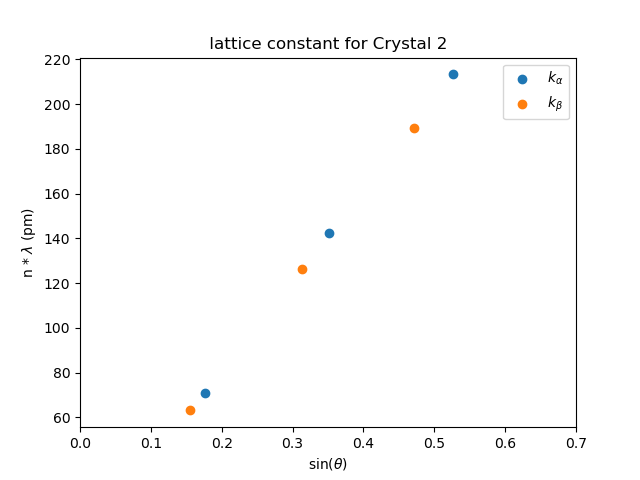

Text(0.5, 1.0, ' lattice constant for Crystal 2 ')

In [212]:
plt.figure()

plt.errorbar(np.sin(theta_ka_2 * (np.pi/180)), ka_array/(1*10**-12) , xerr =np.sin(theta_ka_unc_2* (np.pi/180)), yerr = ka_array_unc/(1*10**-12) , ls = 'none')

plt.errorbar(np.sin(theta_kb_2 * (np.pi/180)), kb_array/(1*10**-12) , xerr =np.sin(theta_kb_unc_2* (np.pi/180)), yerr = kb_array_unc/(1*10**-12) , ls = 'none')

plt.scatter( np.sin(theta_ka_2*(np.pi/180)), ka_array/(1*10**-12))

plt.scatter(np.sin(theta_kb_2*(np.pi/180)), kb_array/(1*10**-12))

plt.xlabel("sin(" +  (r"$\theta$") + ")")

plt.xlim((0, .7))

plt.ylabel("n * $\lambda$ (pm)")


plt.legend([r"$k_{\alpha}$" , r"$k_{\beta}$"])

plt.title(" lattice constant for Crystal 2 ")

So this is a promising start. Both datasets show a linear trend and the lattice constant is expected to have a linear relationship. It is required to use ODR line fitting since the output variable has an uncertainty associated with it. This will reveal which crystal is which.  

# ODR Fitting to find Lattice constants for the mystery crystals

It is required to fit the data with the lines of best fit. The slope of the line will determine the lattice constant of each of the crystals. 

This will require the defining of models using the scipy module. 

The lattice constant is the slope found when plotting $n*\lambda$ vs $sin(\theta)$

![Fig 7](Fig7BraggExample.jpeg "Example")

Source: https://osf.io/37q46/wiki/5.%20Data%20Analysis/

## Define the model 

Lattice constants are expected to have a linear trend. The intercept has to be 0 since if the mode is 0, there shouldn't be any diffraction. 

In [213]:
def f(B,x):
    
    '''Linear function '''
    ''' This is the model that is believed to accurately predict the data'''
    '''B[0] is the slope and B[1] is the intercept'''
    
    return B[0]*x

In [214]:
linear = odr.Model(f)

## Define the data arrays for crystal 1 to be used in ODR fitting

In [215]:
# Y-values for ODR Line fitting - n * lambda

wav_final_1 = []
wav_final_unc_1 = []

for kb, ka in zip(kb_array, ka_array):
    wav_final_1.append(kb)
    wav_final_1.append(ka)

for kb_unc, ka_unc in zip(kb_array_unc, ka_array_unc):
    wav_final_unc_1.append(kb_unc)
    wav_final_unc_1.append(ka_unc)


# X-values for ODR Line fitting - sin(theta)

theta_final_1 = []
theta_final_unc_1 = []

for theta_b, theta_a in zip(theta_kb_1, theta_ka_1):
    theta_final_1.append(theta_b)
    theta_final_1.append(theta_a)

for theta_b_unc, theta_a_unc in zip(theta_kb_unc_1, theta_ka_unc_1):
    theta_final_unc_1.append(theta_b_unc)
    theta_final_unc_1.append(theta_a_unc)


# 
wav_final_1 = np.asarray(wav_final_1)

wav_final_unc_1 = np.asarray(wav_final_unc_1)


theta_final_1 = np.asarray(theta_final_1)

theta_final_unc_1 = np.asarray(theta_final_unc_1)

## Print out crystal 1 variables and check their values 

In [216]:
wav_final_1

array([6.3090e-11, 7.1080e-11, 1.2618e-10, 1.4216e-10, 1.8927e-10,
       2.1324e-10])

In [217]:
wav_final_unc_1

array([5.e-16, 5.e-16, 5.e-16, 5.e-16, 5.e-16, 5.e-16])

In [218]:
theta_final_1

array([ 6.2,  7. , 12.8, 14.4, 19.5, 22. ])

In [219]:
theta_final_unc_1

array([0.05, 0.05, 0.05, 0.05, 0.05, 0.05])

## Define model parameters and solve 

In [220]:
# modification factor to determine systematic error 

mod = .15

#Create data variable for odr

data = odr.RealData(np.sin((theta_final_1 + mod) * (np.pi/180)), wav_final_1/(1*10**-12), sx = np.sin(theta_final_unc_1*(np.pi/180))  , sy = (wav_final_unc_1/(1*10**-12)) )

In [221]:
myodr = odr.ODR(data, linear, beta0 = [0])

In [222]:
myoutput = myodr.run() 

In [223]:
myoutput.pprint() 

Beta: [564.89499551]
Beta Std Error: [0.93621321]
Beta Covariance: [[0.61322524]]
Residual Variance: 1.4293201238799749
Inverse Condition #: 1.0
Reason(s) for Halting:
  Sum of squares convergence


In [224]:
#Setup the variables to use 

B_0 = myoutput.beta[0] 

B_0_err = myoutput.sd_beta[0]

<IPython.core.display.Javascript object>


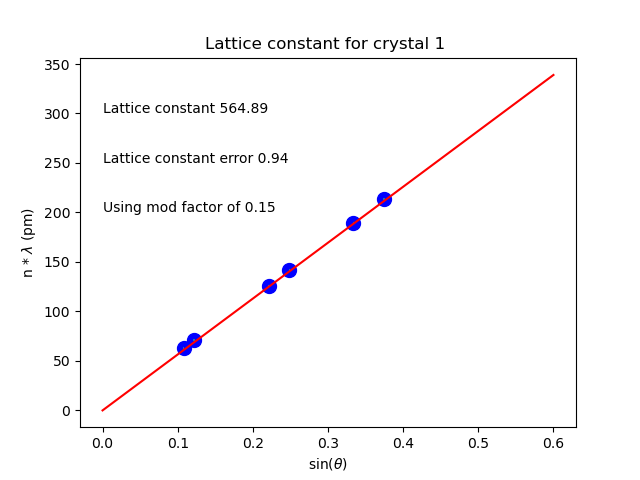

In [225]:


# Set up the figure for plotting 

plt.figure()


x_1 = np.arange(0,.7,.1)

plt.fill_between(x_1, ((B_0 - B_0_err)*x_1)  , ((B_0 + B_0_err)*x_1))

plt.errorbar(np.sin(theta_final_1* (np.pi/180)),  wav_final_1/(1*10**-12), xerr =np.sin(theta_final_unc_1*(np.pi/180)) , yerr = (wav_final_unc_1/(1*10**-12)) , ls ='none')

plt.scatter(np.sin(theta_final_1* (np.pi/180)), wav_final_1/(1*10**-12), s = 100, color = "blue")

plt.plot(x_1, B_0 * x_1, color = 'red')


plt.text(0,300, F"Lattice constant {np.round(B_0,2)}")


plt.text(0,250, F"Lattice constant error {np.round(B_0_err,2)}")

if(mod != 0):
    plt.text(0, 200, "Using mod factor of " + str(.15))

#Add labels to voltage frequency 
plt.xlabel("sin(" +  (r"$\theta$") + ")")

plt.ylabel("n * $\lambda$ (pm)")

plt.title("Lattice constant for crystal 1 ")

plt.savefig("LatticeConstantForCrystal1")


# Conclusions for Crystal 1 

Lattice constant for crystal 1 was found to be 570 +/- 1.78 pm. The lattice crystal constant that was closest to this was the one for salt which is 564.02 pm. However, it is necessary to see how many standard deviations the true value is from the calculated value. 

In [226]:
std_mean = (np.abs(570 - 564.02)/1.79)

std_mean

3.340782122905038

The true value seems to be 3.3 standard deviations from the mean. I would not expect to see this value very frequently. Thus the calculated value seems to not indicate the crystal is salt. There seems to be a systematic error present. If the theta value array was modified to increase by only .15 degrees, the Lattice constant becomes 564.89 +/- 0.94 pm. It was time to analyze the standard deviation again. 



In [227]:
std_mean = (np.abs(564.89 - 564.02)/.94)

std_mean

0.925531914893622

The true value deviates from this newly calculated value by only .92 standard deviations from the mean. This value would be seen quite frequently if many samples were to be tested. 

So it looks like the appropriate peaks were not found and the errors extended from the incorrect thetas. 

## Define data arrays for crystal 2 to be used in ODR fit 

In [228]:
# X-values for ODR Line fitting 
wav_final_2 = []
wav_final_unc_2 = []

for kb, ka in zip(kb_array, ka_array):
    wav_final_2.append(kb)
    wav_final_2.append(ka)

for kb_unc, ka_unc in zip(kb_array_unc, ka_array_unc):
    wav_final_unc_2.append(kb_unc)
    wav_final_unc_2.append(ka_unc)


# Y-values for ODR Line fitting 

theta_final_2 = []
theta_final_unc_2 = []

for theta_b, theta_a in zip(theta_kb_2, theta_ka_2):
    theta_final_2.append(theta_b)
    theta_final_2.append(theta_a)

for theta_b_unc, theta_a_unc in zip(theta_kb_unc_2, theta_ka_unc_2):
    theta_final_unc_2.append(theta_b_unc)
    theta_final_unc_2.append(theta_a_unc)


# 
wav_final_2 = np.asarray(wav_final_2)

wav_final_unc_2 = np.asarray(wav_final_unc_2)


theta_final_2 = np.asarray(theta_final_2)

theta_final_unc_2 = np.asarray(theta_final_unc_2)

### Print out all variables to make sure they look good before sending to ODR model 

In [229]:
wav_final_2

array([6.3090e-11, 7.1080e-11, 1.2618e-10, 1.4216e-10, 1.8927e-10,
       2.1324e-10])

In [230]:
wav_final_unc_2

array([5.e-16, 5.e-16, 5.e-16, 5.e-16, 5.e-16, 5.e-16])

In [231]:
theta_final_2

array([ 8.9, 10.2, 18.3, 20.6, 28.1, 31.8])

In [232]:
theta_final_unc_2

array([0.05, 0.05, 0.05, 0.05, 0.05, 0.05])

Everything looks good. Now it is time to continue with defining the model 

## Define model parameters and solve 

In [233]:
data = odr.RealData(np.sin(theta_final_2* (np.pi/180)), wav_final_2/(1*10**-12), sx = np.sin(theta_final_unc_2*(np.pi/180))  , sy = (wav_final_unc_2/(1*10**-12)))

In [234]:
myodr = odr.ODR(data, linear, beta0 = [0])

In [235]:
myoutput = myodr.run() 

In [236]:
myoutput.pprint() 

Beta: [403.37260817]
Beta Std Error: [0.69183795]
Beta Covariance: [[0.15943177]]
Residual Variance: 3.002160498795601
Inverse Condition #: 1.0
Reason(s) for Halting:
  Sum of squares convergence


In [237]:
#Setup the variables to use 

B_0 = myoutput.beta[0] 

B_0_err = myoutput.sd_beta[0]

<IPython.core.display.Javascript object>


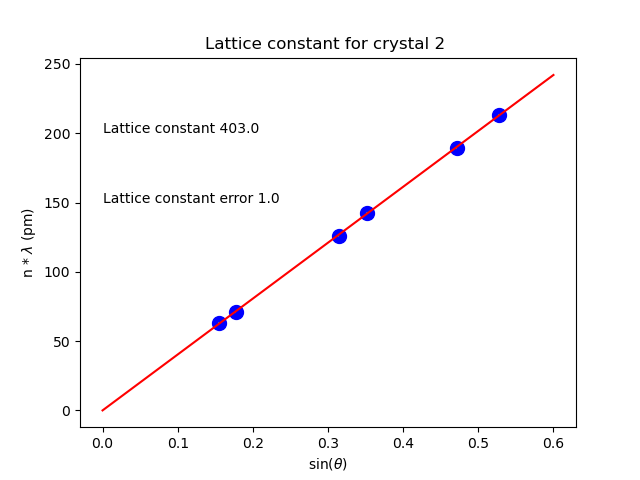

In [238]:

# Set up the figure for plotting crystal 2 slope 

plt.figure()


x_1 = np.arange(0,.7,.1)

plt.fill_between(x_1, ((B_0 - B_0_err)*x_1)  , ((B_0 + B_0_err)*x_1))

plt.errorbar(np.sin(theta_final_2* (np.pi/180)),  wav_final_2/(1*10**-12), xerr =np.sin(theta_final_unc_2*(np.pi/180)) , yerr = (wav_final_unc_2/(1*10**-12)) , ls ='none')

plt.scatter(np.sin(theta_final_2* (np.pi/180)), wav_final_2/(1*10**-12), s = 100, color = "blue")

plt.plot(x_1, B_0 * x_1, color = 'red')


plt.text(0,200, F"Lattice constant {np.round(B_0)}")


plt.text(0,150, F"Lattice constant error {np.round(B_0_err)}")

#Add labels to voltage frequency 
plt.xlabel("sin(" +  (r"$\theta$") + ")")

plt.ylabel("n * $\lambda$ (pm)")


plt.title("Lattice constant for crystal 2 ")

plt.savefig("LatticeConstantMysteryCrystal2")


# Conclusion for the data from crystal 2  

The slope was found to be 403 pm for the data from crystal 2. This is the lattice constant for LiF. The distance between each of the atoms in an LiF crystal is found to be 402.6 pm or .4026 nm. The uncertainty on this slope was found to be 1. A very small uncertainty. Thus this value is exact. 

According to princetonscientific, lattice constant for LiF is .4026 nm. This matches up perfectly with the data. 

Thus the "mystery crystal # 2" is LiF. However, it is still necessary to see how far the true value deviates from the calculated value. 

In [239]:
std_means = np.abs(403-402.6)/1

std_means

0.39999999999997726

only .4 of a standard deviation away from the mean. This is a value I would expect to see quite often. This is good evidence that crystal 2 is indeed LiF. 